In [30]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

input_file = "ds_salaries.csv"
data = pd.read_csv(input_file, header = 0)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [31]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


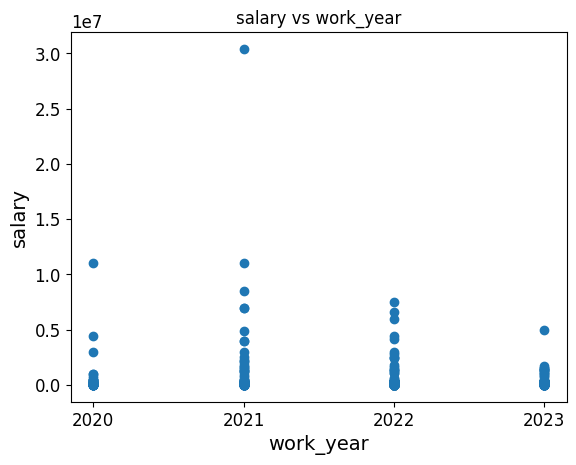

In [32]:
import matplotlib.pyplot as plt

# Create a scatter plot of YearsExperience vs Salary
plt.scatter(data['work_year'], data['salary'])

# Add labels and title to the plot
plt.xticks(range(int(min(data['work_year'])), int(max(data['work_year']))+1, 1))

plt.xlabel('work_year')
plt.ylabel('salary')
plt.title('salary vs work_year')

# Show the plot
plt.show()

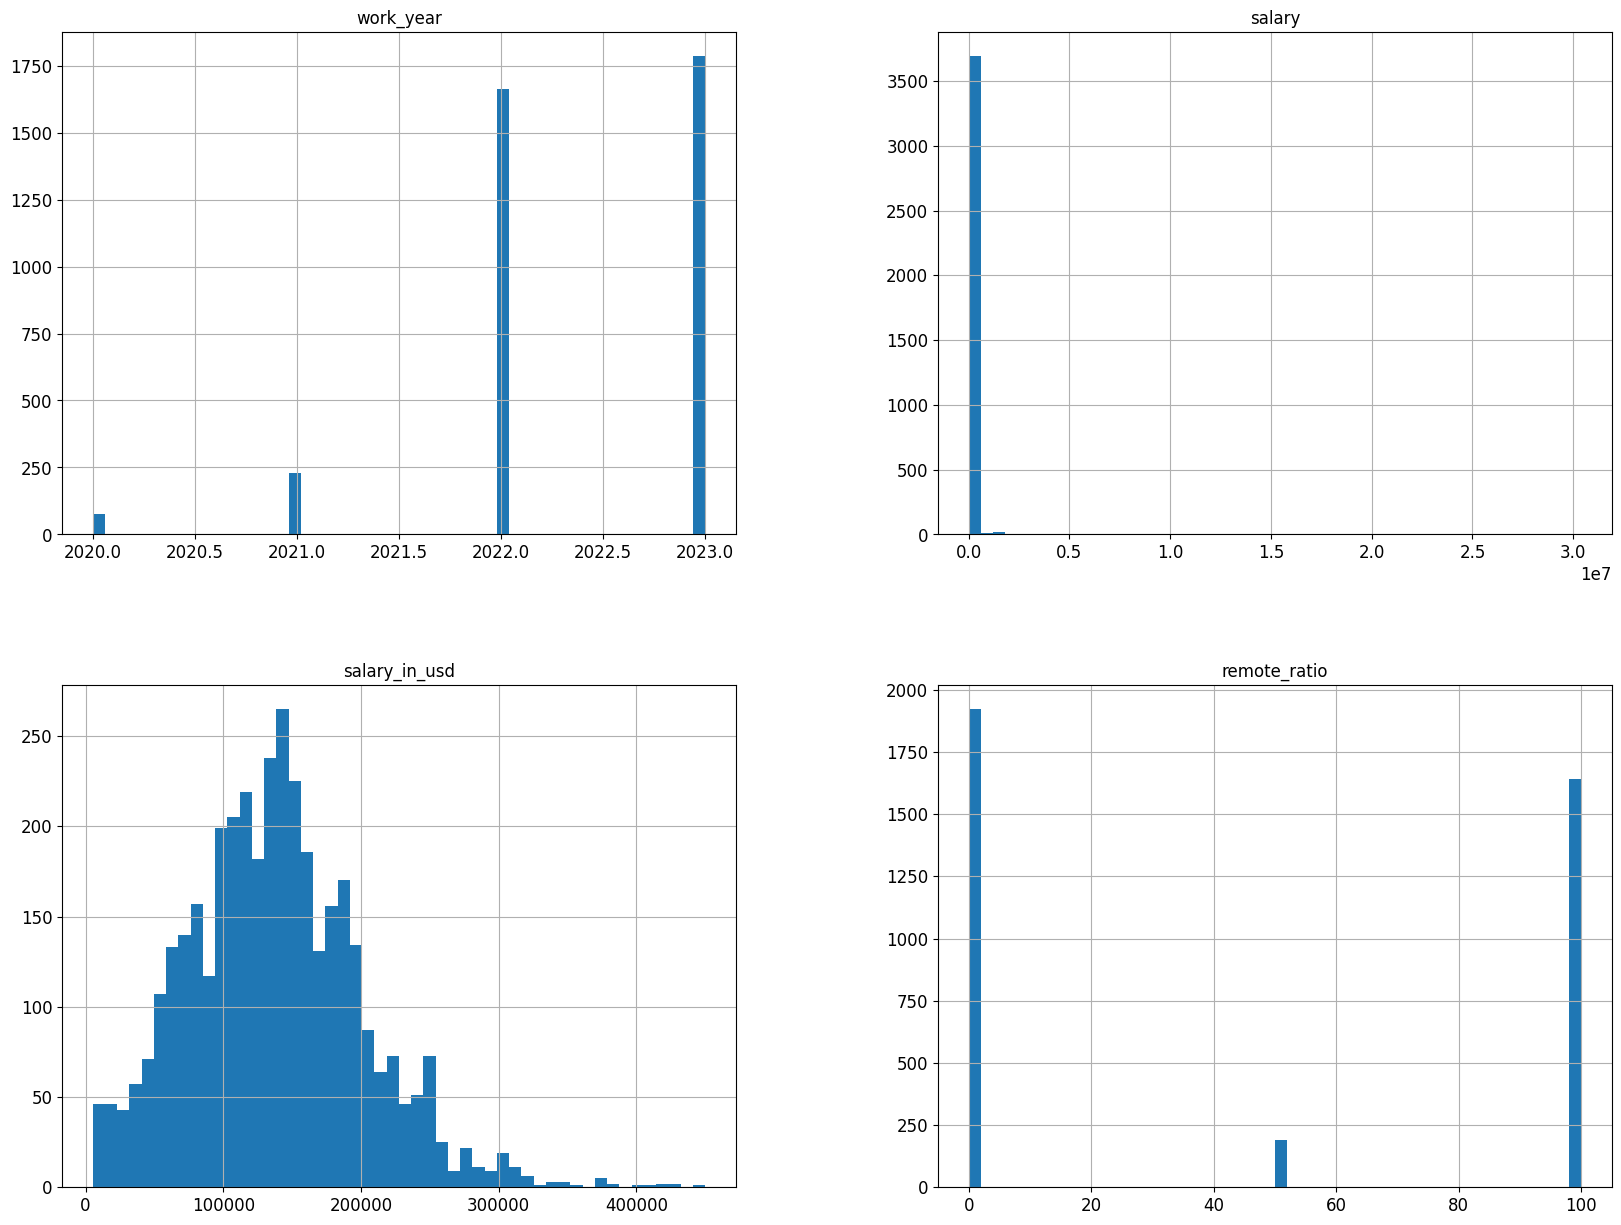

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

plt.show()

# Clean up the set


#### Check if there are any missing values in our columns

In [34]:
#check for missing values

columns_with_miss = data.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 0


Series([], dtype: int64)

#### Drop the unuseful columns: salary, salary_currency (both covered by salary_in_usd).

In [35]:
data.drop(columns=['salary', 'salary_currency'], inplace=True)
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


### Transform String data to Integer values
#### First, print all column's possible values to see what we are working with

In [36]:
for column in data.columns:
    if data[column].dtype != 'int64':
        print(data[column].value_counts())
print(data['company_location'].value_counts())

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_locati

#### Codify simple, ordinal data
experience_level (entry, mid, senior, executive)

In [37]:
data['experience_level'].replace({
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4,
}, inplace=True)

company_size (S, M, L)

In [38]:
data['company_size'].replace({
    'S': 1,
    'M': 2,
    'L': 3
}, inplace=True)

remote_ratio (0, 50, 100) ->  (0, 1, 2)

In [39]:
data['remote_ratio'].replace({
    0: 0,
    50: 1,
    100: 2
}, inplace=True)

#### Codify non-ordinal data
by converting a column to multiple binary value columns

In [44]:
def binarize_column(data, column):
    dummies = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dummies], axis=1)
    data.drop(columns=[column], inplace=True)
    return data

employment_type
FT    2973
PT      15
CT       9
FL       7

In [45]:
binarize_column(data, 'employment_type')

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,2023,3,Principal Data Scientist,85847,ES,2,ES,3,0,0,1,0
1,2023,2,ML Engineer,30000,US,2,US,1,1,0,0,0
2,2023,2,ML Engineer,25500,US,2,US,1,1,0,0,0
3,2023,3,Data Scientist,175000,CA,2,CA,2,0,0,1,0
4,2023,3,Data Scientist,120000,CA,2,CA,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,Data Scientist,412000,US,2,US,3,0,0,1,0
3751,2021,2,Principal Data Scientist,151000,US,2,US,3,0,0,1,0
3752,2020,1,Data Scientist,105000,US,2,US,1,0,0,1,0
3753,2020,1,Business Data Analyst,100000,US,2,US,3,1,0,0,0


job_title simplification (reduce it to 4 main job categories)

In [13]:
def map_job_title_to_category(job_title):
    if "analyst" in job_title.lower():
        return "Data Analyst"
    elif "machine" in job_title.lower():
        return "Machine Learning Engineer"
    elif "scientist" in job_title.lower():
        return "Data Scientist"
    elif "engineer" in job_title.lower():
        return "Data Engineer"
    else:
        return "Other"

# Create a new column called "job_category" and remove old column
data["job_category"] = data["job_title"].apply(map_job_title_to_category)
data["job_category"].value_counts()
data = data.drop('job_title', axis=1)

employee_residence (bin all countries with less than x value)

In [14]:
# Number of occurrences for each country
country_counts = data["employee_residence"].value_counts()

# Create a list with all the countries that have less than x occurrences
other_countries = list(country_counts[country_counts < 10].index)

# Replace the countries in the "other_countries" list with "Other"
data["employee_residence"].replace(other_countries, "Other", inplace=True)
data.value_counts('employee_residence')

employee_residence
US       3004
Other     174
GB        167
CA         85
ES         80
IN         71
DE         48
FR         38
BR         18
PT         18
GR         16
NL         15
AU         11
MX         10
dtype: int64

company_location (bin all countries with less than x value)

In [15]:
# Number of occurrences for each country
country_counts = data["company_location"].value_counts()

# Create a list with all the countries that have less than x occurrences
other_countries = list(country_counts[country_counts < 10].index)

# Replace the countries in the "other_countries" list with "Other"
data["company_location"].replace(other_countries, "Other", inplace=True)
data.value_counts('company_location')

company_location
US       3040
GB        172
Other     151
CA         87
ES         77
IN         58
DE         56
FR         34
BR         15
AU         14
GR         14
PT         14
NL         13
MX         10
dtype: int64

In [16]:
data.value_counts()

work_year  experience_level  employment_type  salary_in_usd  employee_residence  remote_ratio  company_location  company_size  job_category  
2022       3                 FT               191475         US                  2             US                2             Data Scientist    22
                                              141525         US                  2             US                2             Data Scientist    22
2023       3                 FT               252000         US                  0             US                2             Data Engineer     13
                                              129000         US                  0             US                2             Data Engineer     13
2022       3                 FT               129300         US                  0             US                2             Data Scientist    12
                                                                                                                      

# Test set

In [17]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratify by experience level since that is one of the most important attributes
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["experience_level"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [20]:
#check distribution of train and test
strat_test_set["experience_level"].value_counts() / len(strat_test_set)

3    0.669774
2    0.214381
1    0.085220
4    0.030626
Name: experience_level, dtype: float64

In [21]:
strat_train_set["experience_level"].value_counts() / len(strat_train_set)

3    0.670107
2    0.214381
1    0.085220
4    0.030293
Name: experience_level, dtype: float64

#### Check distribution of Experience_level in different sets: Overall, Stratified, Randomized

In [22]:
def income_cat_proportions(data):
    return data["experience_level"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [23]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.085220,0.085220,0.089214,4.687500,0.000000
2,0.214381,0.214381,0.209055,-2.484472,0.000000
3,0.670040,0.669774,0.671105,0.158983,-0.039746
4,0.030360,0.030626,0.030626,0.877193,0.877193


In [24]:
#cautam corelatia dintre salariu si restul atributelor
data = strat_train_set.copy()
corr_matrix = data.corr()
corr_matrix["salary_in_usd"].sort_values(ascending=False)

C:\Users\rober\AppData\Local\Temp\ipykernel_28796\1998377962.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


salary_in_usd       1.000000
experience_level    0.446558
work_year           0.235873
company_size        0.005820
remote_ratio       -0.062933
Name: salary_in_usd, dtype: float64